In [1]:
import matplotlib.pyplot as plt
import numpy as np

from teyssier import riemann
from superfv.euler_solver import EulerSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis

In [2]:
N = 50

sim0 = EulerSolver(
    ic=ic.sod_shock_tube_1d,
    bcx="free",
    riemann_solver="hllc",
    nx=N,
    p=1,
    MUSCL=True,
    MUSCL_limiter="moncen",
    flux_recipe=2,
)

sim = EulerSolver(
    ic=ic.sod_shock_tube_1d,
    bcx="free",
    riemann_solver="hllc",
    nx=N,
    p=3,
    flux_recipe=2,
    lazy_primitives=True,
    ZS=True,
    PAD={"rho": (0, None), "P": (0, None)},
)

In [3]:
sim0.musclhancock(0.245)
sim.ssprk3(0.245)

Step #33 @ t=2.45e-01 | dt=5.65e-03 | min(rho)=1.25e-01, min(P)=1.00e-01 | (done)                   
Step #33 @ t=2.45e-01 | dt=4.29e-03 | min(rho)=1.25e-01, min(P)=1.00e-01 | (done)                   


In [4]:
# compute analytical solution

# compute exact solution
xana = (np.arange(1024) + 0.5) / 1024
wana = np.zeros([3, 1024])
for i in range(0, np.size(xana)):
    s = (xana[i] - 0.5) / 0.245
    d, v, p = riemann.exact_solution(s, [1, 0, 1], [0.125, 0, 0.1])
    wana[:, i] = [d, v, p]

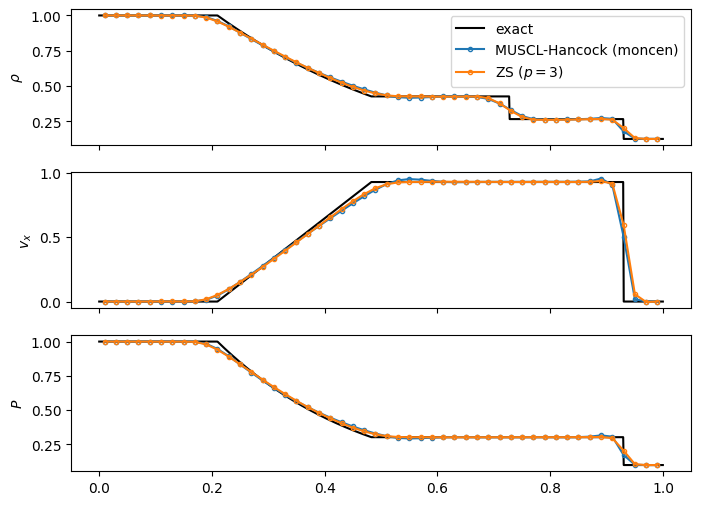

In [5]:
fig, axs = plt.subplots(3, 1, sharex=True, sharey="row", figsize=(8, 6))

axs[0].set_ylabel(r"$\rho$")
axs[1].set_ylabel(r"$v_x$")
axs[2].set_ylabel(r"$P$")

style = dict(marker=".", mfc="none", linestyle="-")

axs[0].plot(xana, wana[0], color="k", label="exact")
vis.plot_1d_slice(
    sim0,
    axs[0],
    "rho",
    **style,
    label=f"MUSCL-Hancock ({sim0.base_scheme.limiter_config.limiter})",
)
vis.plot_1d_slice(sim, axs[0], "rho", **style, label=r"ZS ($p=3$)")

axs[1].plot(xana, wana[1], color="k", label="exact")
vis.plot_1d_slice(sim0, axs[1], "vx", **style)
vis.plot_1d_slice(sim, axs[1], "vx", **style)

axs[2].plot(xana, wana[2], color="k", label="exact")
vis.plot_1d_slice(sim0, axs[2], "P", **style)
vis.plot_1d_slice(sim, axs[2], "P", **style)

axs[0].legend()